In [7]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, DictionaryLearning
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE



Using the breast cancer dataset set from previous modules, we will identify the features and the target variable.

In [2]:

# Load and prepare data
data = load_breast_cancer()
X = data.data
y = data.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


The following applies the principal components for the breast cancer data.

In [3]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_


In this example, it appears there are 2 principle components. Based on the visualizations, the two principal components are malignant and benign for the breast cancer data.

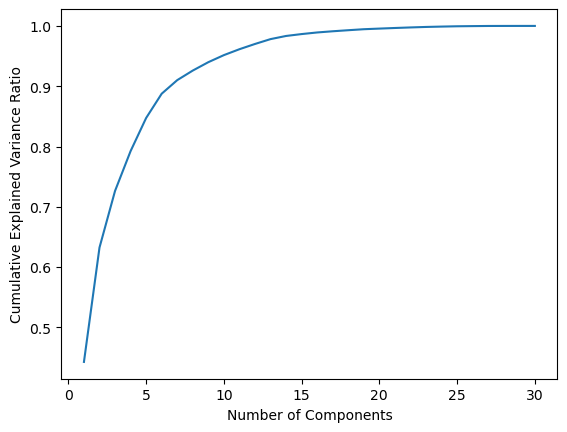

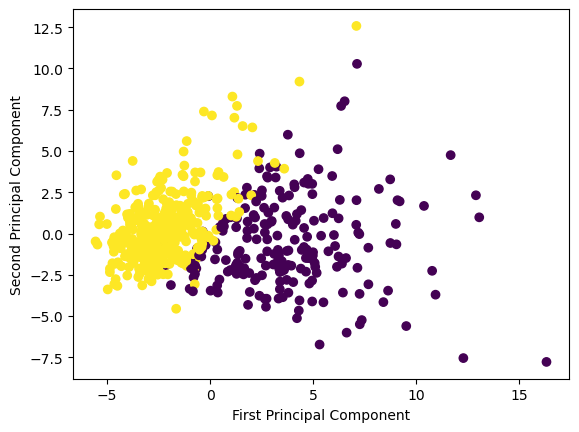


Feature loadings for first 2 principal components:
mean radius: PC1=0.219, PC2=-0.234
mean texture: PC1=0.104, PC2=-0.060
mean perimeter: PC1=0.228, PC2=-0.215
mean area: PC1=0.221, PC2=-0.231
mean smoothness: PC1=0.143, PC2=0.186
mean compactness: PC1=0.239, PC2=0.152
mean concavity: PC1=0.258, PC2=0.060
mean concave points: PC1=0.261, PC2=-0.035
mean symmetry: PC1=0.138, PC2=0.190
mean fractal dimension: PC1=0.064, PC2=0.367
radius error: PC1=0.206, PC2=-0.106
texture error: PC1=0.017, PC2=0.090
perimeter error: PC1=0.211, PC2=-0.089
area error: PC1=0.203, PC2=-0.152
smoothness error: PC1=0.015, PC2=0.204
compactness error: PC1=0.170, PC2=0.233
concavity error: PC1=0.154, PC2=0.197
concave points error: PC1=0.183, PC2=0.130
symmetry error: PC1=0.042, PC2=0.184
fractal dimension error: PC1=0.103, PC2=0.280
worst radius: PC1=0.228, PC2=-0.220
worst texture: PC1=0.104, PC2=-0.045
worst perimeter: PC1=0.237, PC2=-0.200
worst area: PC1=0.225, PC2=-0.219
worst smoothness: PC1=0.128, PC2=0

In [4]:

# Plot explained variance
plt.plot(range(1, len(explained_variance_ratio) + 1), 
        np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

# Get top 2 components for visualization
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

# Plot first two principal components
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=y)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

# Print component loadings for first 2 PCs
print("\nFeature loadings for first 2 principal components:")
for i, feature in enumerate(data.feature_names):
   print(f"{feature}: PC1={pca_2.components_[0][i]:.3f}, PC2={pca_2.components_[1][i]:.3f}")

Now that we identified the principal components, we can also apply a t-distributed stochastic neighbor embedding as a nonlinear dimensionalit reduction method to vidualize highly dimensional data. It is important to incorporate t-SNE with another dimension reduction technique (in this example we used PCA).

### PCA:

+ Best for capturing global variance in tumor measurements
+ Shows clear separation between malignant/benign cases based on principal component projections
+ Easily interpretable feature contributions through loadings
+ Useful when analyzing which tumor characteristics contribute most to diagnosis
+ Limited in capturing non-linear relationships

### t-SNE:

+ Better at revealing local clusters in tumor data
+ Often shows clearer separation between malignant/benign groups
+ Preserves neighborhood relationships between similar cases
+ Helpful for identifying subtypes within diagnostic categories
+ Cannot directly interpret feature importance
+ Results vary with perplexity parameter

### Dictionary Learning:

+ Creates sparse representations of tumor characteristics
+ Good for finding recurring patterns in measurements
+ Useful when some features are only relevant for specific cases
+ More computationally intensive than PCA
+ Less stable results compared to PCA

### Recommendations and Analysis


+ Use PCA for feature importance and variance analysis
+ Use t-SNE for visualization and cluster identification
+ Use Dictionary Learning when sparsity is desired or looking for local patterns
+ For breast cancer diagnosis, PCA or t-SNE are typically most appropriate, with PCA preferred when interpretability is crucial.

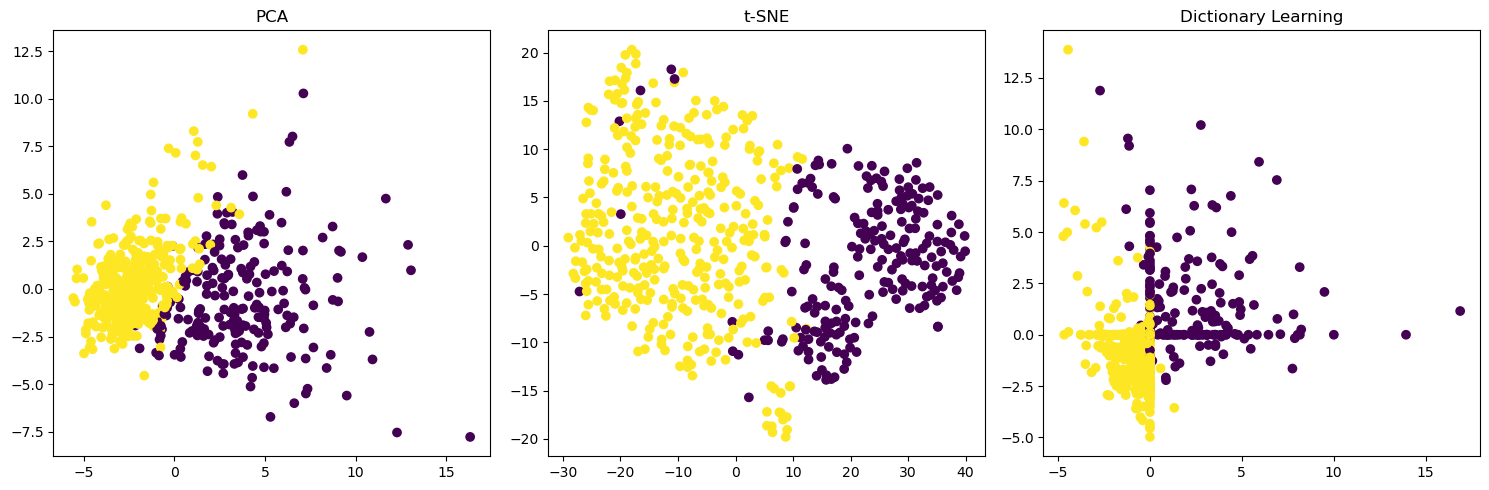

Dictionary sparsity: 0.2812
PCA sparsity: 0.0000


In [12]:
# Dictionary Learning
dl = DictionaryLearning(n_components=2, random_state=42)
X_dict = dl.fit_transform(X_scaled)

# PCA and t-SNE
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plotting
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
ax1.set_title('PCA')

ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
ax2.set_title('t-SNE')

ax3.scatter(X_dict[:, 0], X_dict[:, 1], c=y)
ax3.set_title('Dictionary Learning')

plt.tight_layout()
plt.show()

# Compare sparsity
print(f"Dictionary sparsity: {np.mean(X_dict == 0):.4f}")
print(f"PCA sparsity: {np.mean(X_pca == 0):.4f}")